In [48]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error, r2_score



In [49]:
data =pd.read_csv('F:\\main\\lotto\\cleaned_data.csv')
data

,Draw/Date,Results
0,1751.0,N
1,NaN,11
2,NaN,16
3,NaN,20
4,NaN,53
...,...,...
2354,1539.0,Z
2355,NaN,13
2356,NaN,53
2357,NaN,65


In [50]:
data.head(10)

,Draw/Date,Results
0,1751.0,N
1,NaN,11
2,NaN,16
3,NaN,20
4,NaN,53
5,1750.0,X
6,NaN,27
7,NaN,43
8,NaN,48
9,NaN,65


In [51]:
# Remove rows where both columns are NaN
data1 = data.dropna(how='all', subset=['Draw/Date', 'Results'])

print(data1)

      Draw/Date Results
0        1751.0       N
1           NaN      11
2           NaN      16
3           NaN      20
4           NaN      53
...         ...     ...
2354     1539.0       Z
2355        NaN      13
2356        NaN      53
2357        NaN      65
2358        NaN      72

[1065 rows x 2 columns]


In [52]:
data1.head(20)

,Draw/Date,Results
0,1751.0,N
1,NaN,11
2,NaN,16
3,NaN,20
4,NaN,53
5,1750.0,X
6,NaN,27
7,NaN,43
8,NaN,48
9,NaN,65


In [53]:
# Forward fill the "Draw/Date" column
data1["Draw/Date"] = data1["Draw/Date"].fillna(method="ffill")

C:\Users\Dilan\AppData\Local\Temp\ipykernel_5920\1621844889.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data1["Draw/Date"] = data1["Draw/Date"].fillna(method="ffill")
C:\Users\Dilan\AppData\Local\Temp\ipykernel_5920\1621844889.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1["Draw/Date"] = data1["Draw/Date"].fillna(method="ffill")


In [54]:
# Group by "Draw/Date" and aggregate results into separate columns
result_data = data1.groupby("Draw/Date")["Results"].apply(lambda x: pd.Series(x.values)).unstack().reset_index()
result_data

,Draw/Date,0,1,2,3,4
0,1539.0,Z,13,53,65,72
1,1540.0,U,4,10,50,71
2,1541.0,P,8,14,25,54
3,1542.0,L,4,10,28,73
4,1543.0,Z,5,29,39,60
...,...,...,...,...,...,...
208,1747.0,J,1,3,30,44
209,1748.0,M,9,18,52,75
210,1749.0,O,17,26,47,56
211,1750.0,X,27,43,48,65


In [55]:
# Rename columns
result_data.columns = ["Draw/Date", "Result1", "Result2", "Result3", "Result4", "Result5"]
print(result_data)

     Draw/Date Result1 Result2 Result3 Result4 Result5
0       1539.0       Z      13      53      65      72
1       1540.0       U       4      10      50      71
2       1541.0       P       8      14      25      54
3       1542.0       L       4      10      28      73
4       1543.0       Z       5      29      39      60
..         ...     ...     ...     ...     ...     ...
208     1747.0       J       1       3      30      44
209     1748.0       M       9      18      52      75
210     1749.0       O      17      26      47      56
211     1750.0       X      27      43      48      65
212     1751.0       N      11      16      20      53

[213 rows x 6 columns]


In [56]:
result_data.head(10)


,Draw/Date,Result1,Result2,Result3,Result4,Result5
0,1539.0,Z,13,53,65,72
1,1540.0,U,4,10,50,71
2,1541.0,P,8,14,25,54
3,1542.0,L,4,10,28,73
4,1543.0,Z,5,29,39,60
5,1544.0,T,25,57,59,74
6,1545.0,L,12,22,36,52
7,1546.0,C,16,20,31,72
8,1547.0,F,15,43,67,68
9,1548.0,P,8,21,28,46


In [57]:
len(result_data)

213

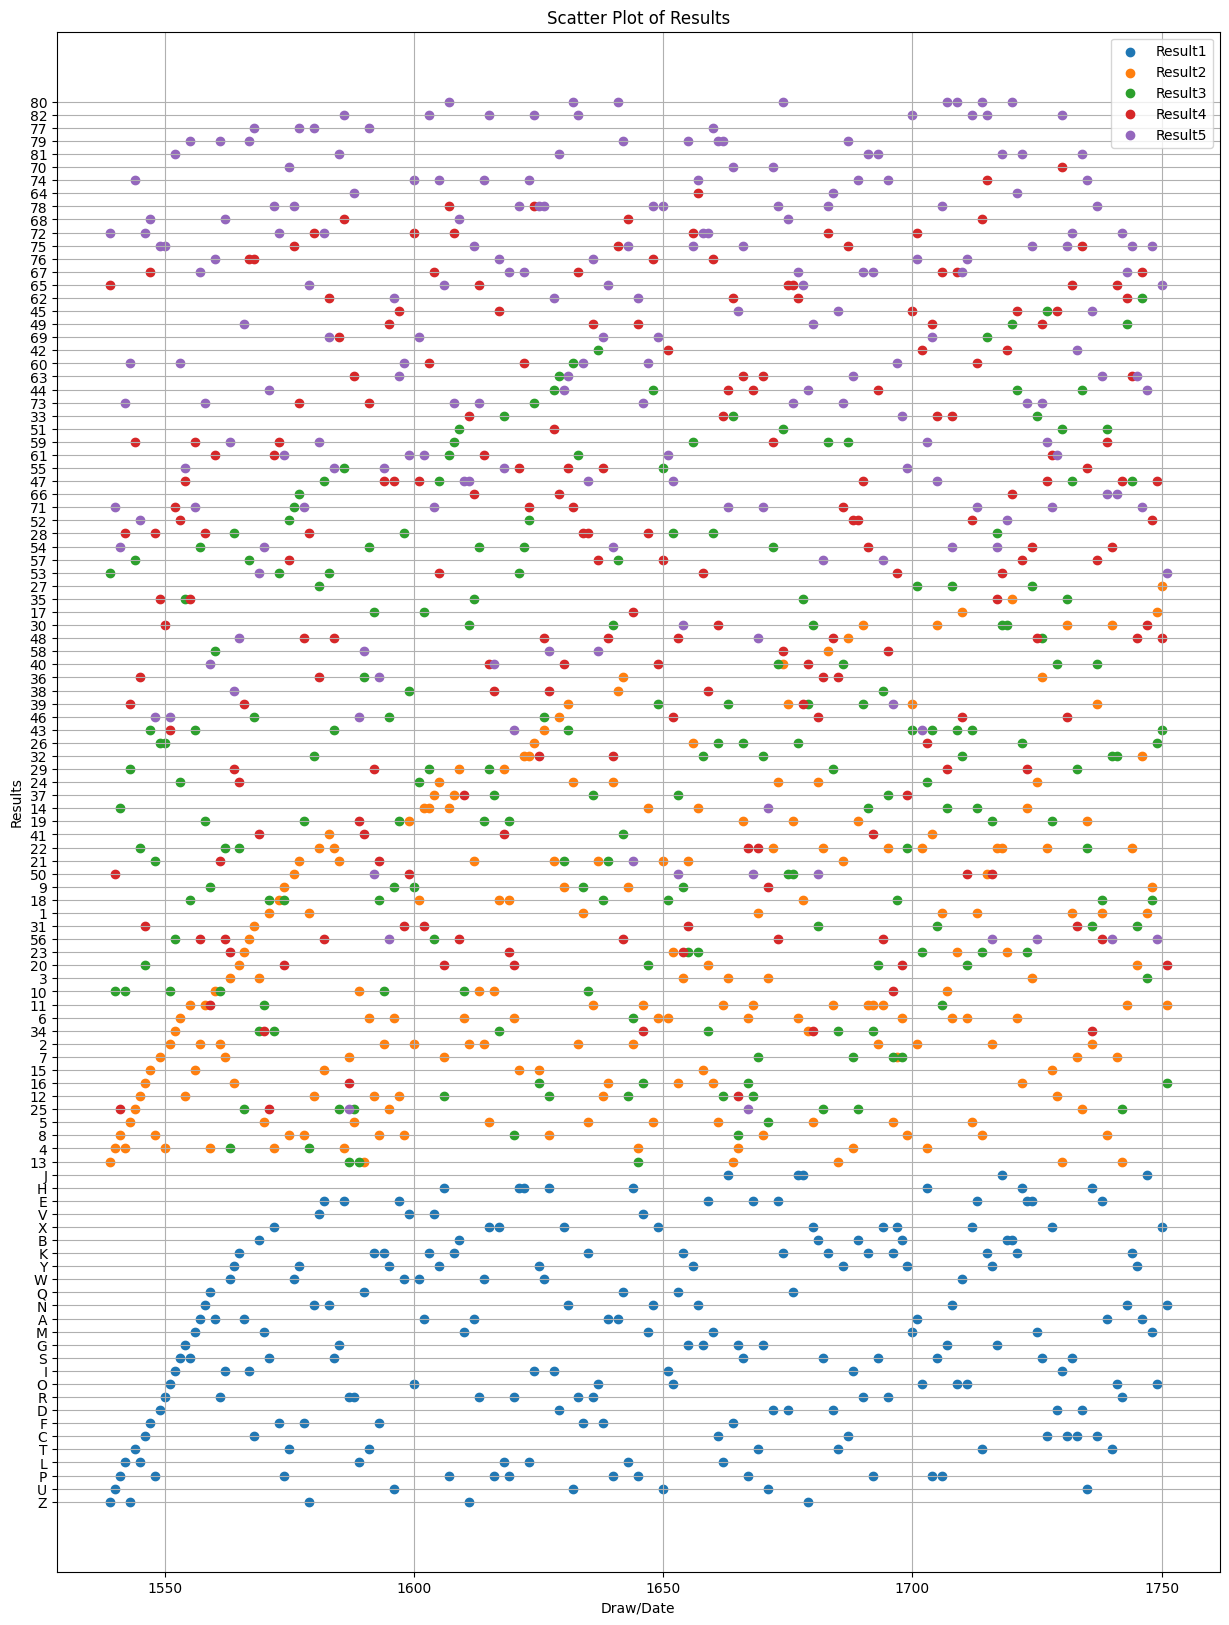

In [58]:
#data visualization
plt.figure(figsize=(15,20))

for i, col in enumerate(['Result1','Result2','Result3','Result4','Result5'],start=1): 
    plt.scatter(result_data['Draw/Date'],result_data[col],label=col)

plt.title("Scatter Plot of Results")
plt.xlabel("Draw/Date")
plt.ylabel("Results")
plt.legend()
plt.grid(True)

plt.show()


In [59]:
#most frequent number 
all = pd.concat([result_data['Result1'],result_data['Result2'],result_data['Result3'],result_data['Result4'],result_data['Result5']])

frequency = all.value_counts().sort_index()
frequency

1      9
10    13
11    15
12    13
13     9
      ..
V      4
W      7
X     11
Y     10
Z      5
Name: count, Length: 108, dtype: int64

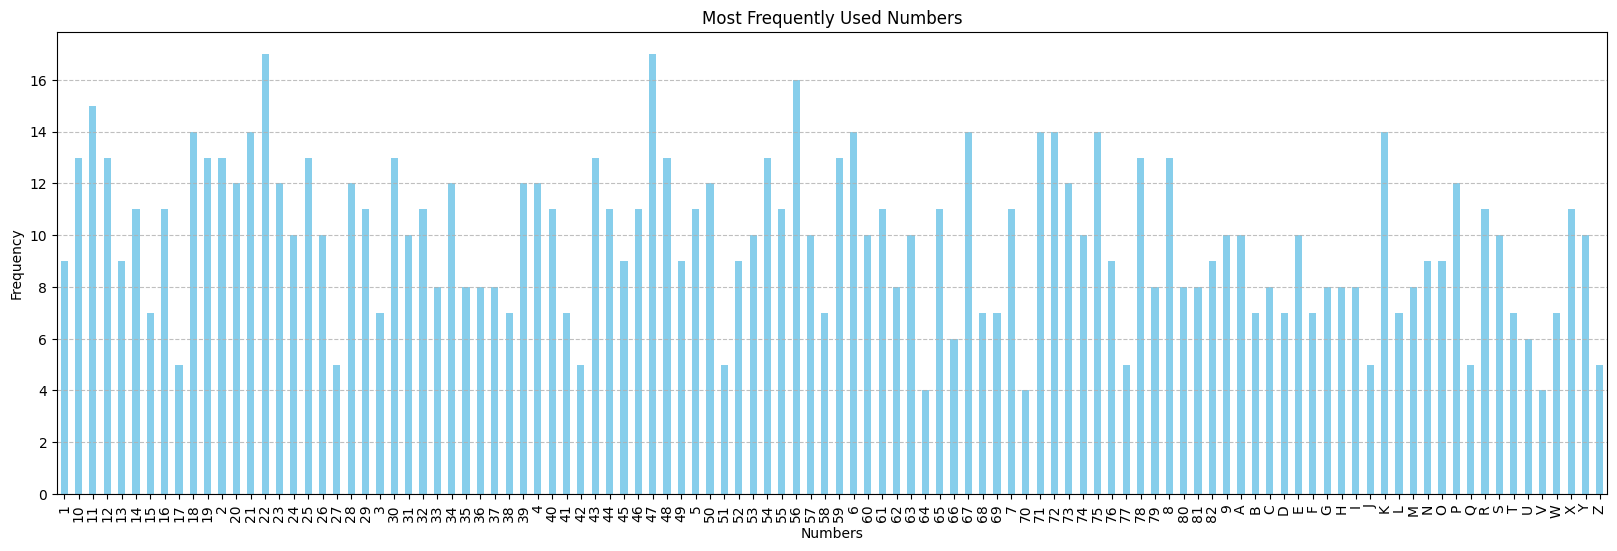

In [60]:
#plotting
plt.figure(figsize=(20,6))
frequency.plot(kind='bar',color='skyblue')

plt.title("Most Frequently Used Numbers")
plt.xlabel("Numbers")
plt.ylabel("Frequency")
plt.xticks(rotation=90)
plt.grid(axis="y", linestyle="--", alpha=0.8)


plt.show()

In [61]:
result_data.describe()

,Draw/Date
count,213.000000
mean,1645.000000
std,61.631972
min,1539.000000
25%,1592.000000
50%,1645.000000
75%,1698.000000
max,1751.000000


In [62]:
result_data

,Draw/Date,Result1,Result2,Result3,Result4,Result5
0,1539.0,Z,13,53,65,72
1,1540.0,U,4,10,50,71
2,1541.0,P,8,14,25,54
3,1542.0,L,4,10,28,73
4,1543.0,Z,5,29,39,60
...,...,...,...,...,...,...
208,1747.0,J,1,3,30,44
209,1748.0,M,9,18,52,75
210,1749.0,O,17,26,47,56
211,1750.0,X,27,43,48,65


In [63]:
new_data = result_data.drop(columns=['Result1','Draw/Date'])
new_data

,Result2,Result3,Result4,Result5
0,13,53,65,72
1,4,10,50,71
2,8,14,25,54
3,4,10,28,73
4,5,29,39,60
...,...,...,...,...
208,1,3,30,44
209,9,18,52,75
210,17,26,47,56
211,27,43,48,65


In [64]:
# Scale the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(new_data)

In [65]:
X = scaled_data[:-1]
y = scaled_data[1:]

In [66]:
X = X.reshape((X.shape[0], 1, X.shape[1]))

In [67]:
# Train-test split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [68]:
# Define the LSTM model
model = Sequential()

In [69]:
# Add LSTM layer(s)
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))

c:\Users\Dilan\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [70]:
# Output layer to predict the next 4 values (Result2, Result3, Result4, Result5)
model.add(Dense(units=4))

In [71]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [72]:
# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=1)

Epoch 1/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - loss: 0.3167 - val_loss: 0.3082
Epoch 2/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.3076 - val_loss: 0.2857
Epoch 3/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.2742 - val_loss: 0.2605
Epoch 4/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.2516 - val_loss: 0.2309
Epoch 5/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.2342 - val_loss: 0.1963
Epoch 6/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.1806 - val_loss: 0.1573
Epoch 7/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1466 - val_loss: 0.1177
Epoch 8/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.1091 - val_loss: 0.0838
Epoch 9/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0875 - val_loss: 0.0650
Epoch 10/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0693 - val_loss: 0.0611
Epoch 11/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0663 - val_loss: 0.0603
Epoch 12/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0596 - val_loss: 0.0587
E

In [73]:
# Get the last known values (the last row of the data)
last_known_values = scaled_data[-1].reshape(1, 1, -1)

In [74]:
# Predict the next row (Result2, Result3, Result4, Result5)
predicted_values = model.predict(last_known_values)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


In [75]:
# Inverse scaling to get the values back to the original scale
predicted_values = scaler.inverse_transform(predicted_values)

In [76]:
# Round the predicted values to integers
predicted_values_int = np.round(predicted_values).astype(int)

In [77]:
# Print the predicted values
print("Predicted values (Result2, Result3, Result4, Result5):", predicted_values_int)

Predicted values (Result2, Result3, Result4, Result5): [[13 25 39 52]]


In [78]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Inverse scaling to bring predictions and actual values back to the original scale
y_pred = scaler.inverse_transform(y_pred)
y_test_inv = scaler.inverse_transform(y_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test_inv, y_pred)
print(f'Mean Squared Error (MSE): {mse}')

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Calculate R-squared (R²)
r2 = r2_score(y_test_inv, y_pred)
print(f'R-squared (R²): {r2}')

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step 
Mean Squared Error (MSE): 242.60476272617507
Root Mean Squared Error (RMSE): 15.57577486760049
R-squared (R²): -0.09171892761102976
